In [1]:
import pandas as pd   
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns

4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`.

In [3]:
gdp_df = pd.read_csv(r'C:\DA12\projects\un-python-ericahen\data\gdp_percapita.csv')

In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

7662 rows, 4 columns. Data types listed above.

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [8]:
gdp_df=gdp_df.drop(columns='Value Footnotes')

In [9]:
gdp_df.head(5)

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [10]:
gdp_df=gdp_df.rename(columns={'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})
gdp_df.head(5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

gdp_df['Country'].value_counts(dropna=False) -- not correct

In [13]:
country_year_counts = gdp_df.groupby('Country')['Year'].nunique()

total_years = gdp_df['Year'].nunique()

countries_all_years = country_year_counts[country_year_counts == total_years].index.tolist()

all_years_countries = len(countries_all_years)
print(all_years_countries)

202


In [14]:
countries_without_all_years = country_year_counts[country_year_counts <= (total_years - 3)].index.tolist()
print(countries_without_all_years)

['Afghanistan', 'Bosnia and Herzegovina', 'Cambodia', 'Cayman Islands', 'Croatia', 'CuraÃ§ao', 'Djibouti', 'Estonia', 'Iceland', 'Israel', 'Kosovo', 'Latvia', 'Liberia', 'Libya', 'Lithuania', 'Maldives', 'Moldova', 'Montenegro', 'Nauru', 'Other small states', 'Palau', 'Qatar', 'San Marino', 'Serbia', 'Sint Maarten (Dutch part)', 'Slovenia', 'Small states', 'Somalia', 'SÃ£o TomÃ© and Principe', 'Timor-Leste', 'Turks and Caicos Islands', 'West Bank and Gaza']


In [15]:
total_years_count = gdp_df['Year'].value_counts().sort_index()
print(total_years_count)

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


<Axes: >

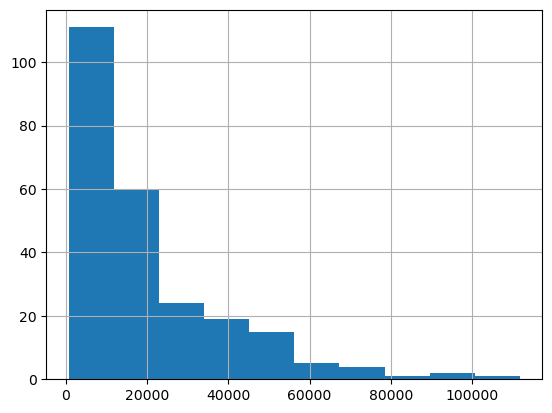

In [17]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020]
gdp_2020['GDP_Per_Capita'].hist()

C:\Users\erica\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

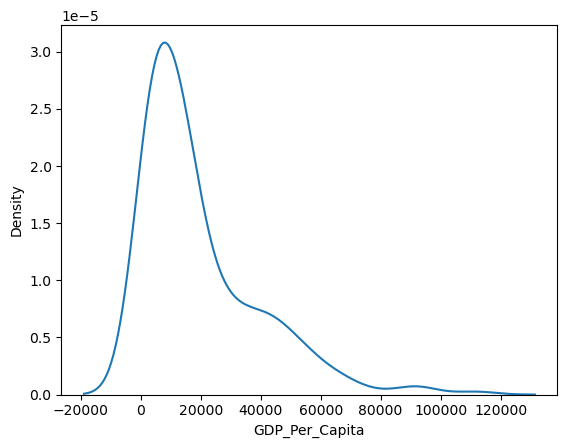

In [18]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

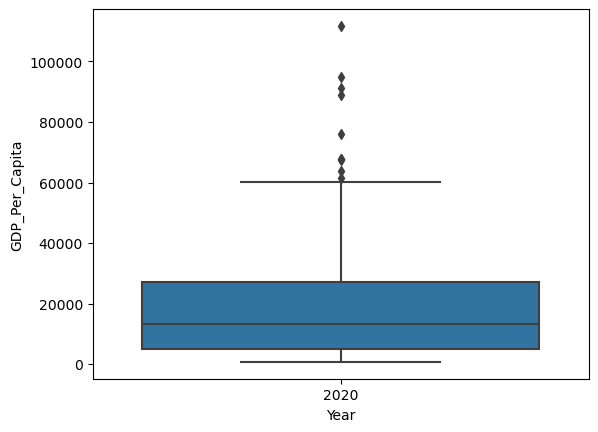

In [19]:
sns.boxplot( x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"] )

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

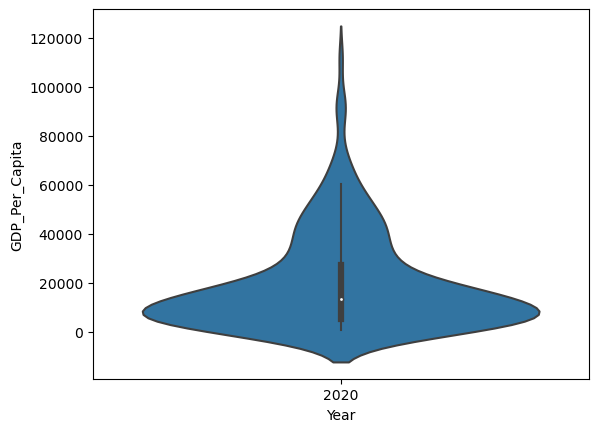

In [20]:
sns.violinplot(x=gdp_2020["Year"], y=gdp_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [22]:
gdp_2020["GDP_Per_Capita"].median()

13357.997573370474

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [24]:
gdp_decades = gdp_df[gdp_df["Year"].isin([1990,2000,2010,2020])]

In [25]:
gdp_decades.head(5)

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

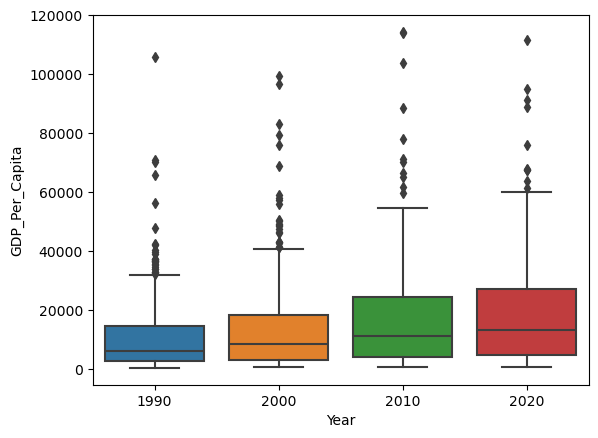

In [26]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

gdp_decades.plot(kind = 'bar',
                                        figsize = (10,6))               # Increase the plot size                

plt.xticks(rotation = 0,                                                # Remove the rotation of the labels
           fontsize = 12)                   
plt.title('GDP Per Capita by Decade',                              # Add a title
         fontsize = 14,
         fontweight = 'bold');

C:\Users\erica\AppData\Local\Temp\ipykernel_3820\2368823046.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


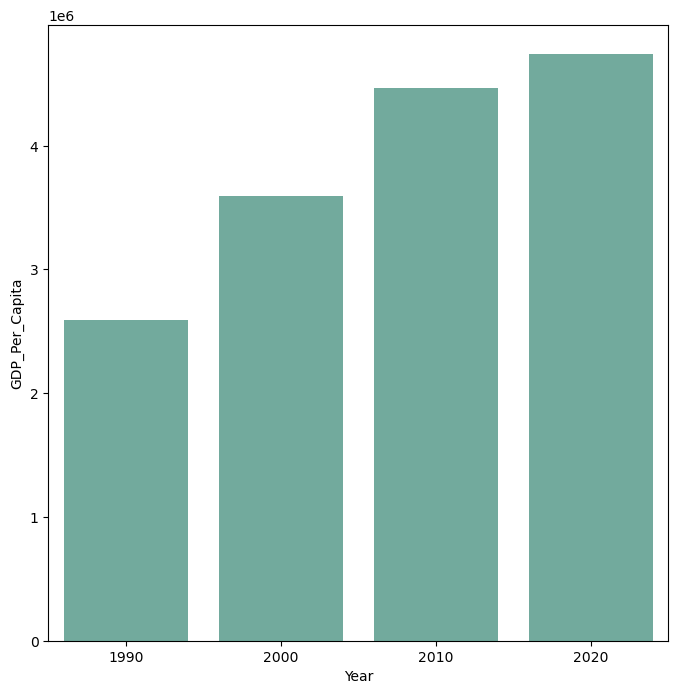

In [28]:
# Set the figure size
plt.figure(figsize=(8, 8))

# plot a bar chart
sns.barplot(
    y="GDP_Per_Capita", 
    x="Year", 
    data=gdp_decades, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

<Axes: xlabel='GDP_Per_Capita', ylabel='Year'>

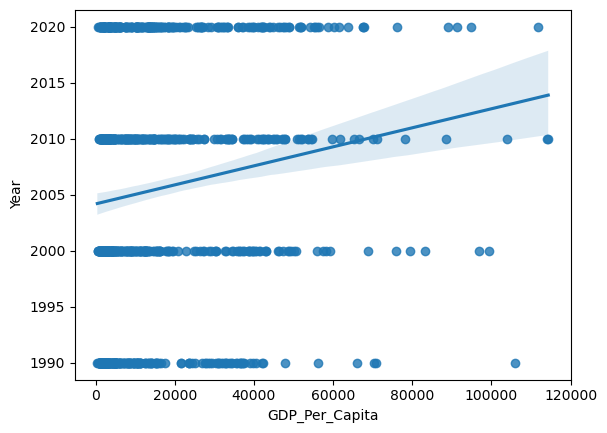

In [29]:
sns.regplot(x=gdp_decades["GDP_Per_Capita"], y=gdp_decades["Year"])

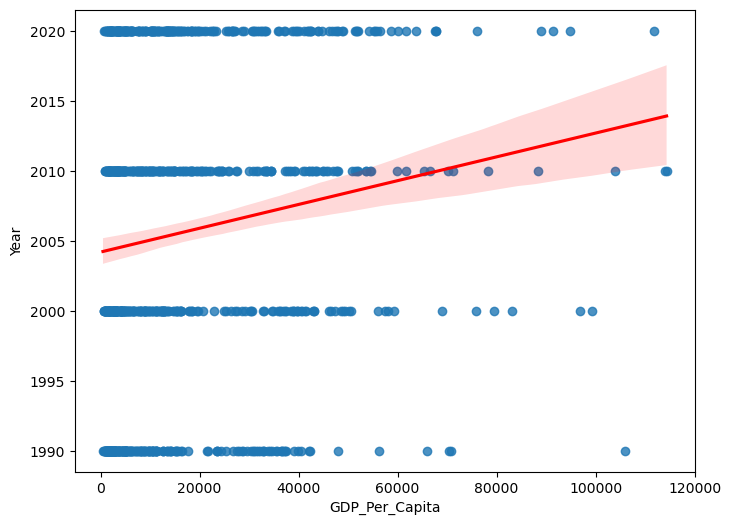

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["GDP_Per_Capita"],
    y=gdp_decades["Year"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?#69b3a2');

In [32]:
gdp_df[gdp_df["GDP_Per_Capita"]>100000]

,Country,Year,GDP_Per_Capita
3277,Ireland,2022,113870.785550
3278,Ireland,2021,102785.490239
4146,Luxembourg,2022,115541.774828
4147,Luxembourg,2021,115683.493708
4148,Luxembourg,2020,111751.314751
4149,Luxembourg,2019,114542.496934
4150,Luxembourg,2018,114164.468558
4151,Luxembourg,2017,114985.842236
4152,Luxembourg,2016,116283.699681
4153,Luxembourg,2015,113182.728563


United Arab Emirates, 1990

12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

gdp_df[gdp_df['GDP_Per_Capita'].max]

In [36]:
gdp_df.groupby("Country")["GDP_Per_Capita"].max()

Country
Afghanistan                     2165.340915
Africa Eastern and Southern     3661.360566
Africa Western and Central      4148.547272
Albania                        15501.662931
Algeria                        11888.322967
                                   ...     
Viet Nam                       11396.531469
West Bank and Gaza              6438.933640
World                          17485.934316
Zambia                          3425.948936
Zimbabwe                        2931.725144
Name: GDP_Per_Capita, Length: 242, dtype: float64

In [37]:
top_country=gdp_2020[["Country", "GDP_Per_Capita"]].agg(max)

C:\Users\erica\AppData\Local\Temp\ipykernel_3820\968430543.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrame.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  top_country=gdp_2020[["Country", "GDP_Per_Capita"]].agg(max)


In [38]:
top_country.head()

Country                Zimbabwe
GDP_Per_Capita    111751.314751
dtype: object

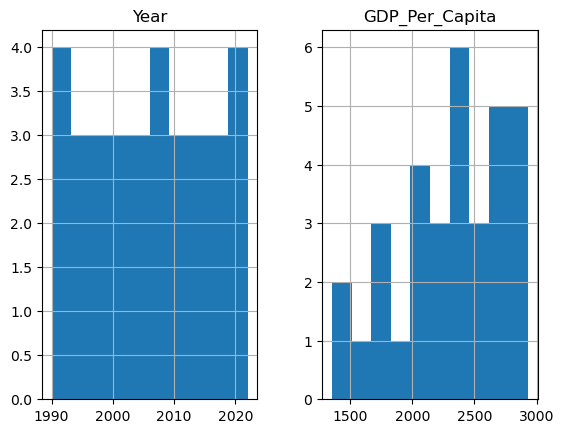

In [39]:
gdp_df[gdp_df["Country"]== "Zimbabwe"].hist()
plt.show()

<Axes: xlabel='Year'>

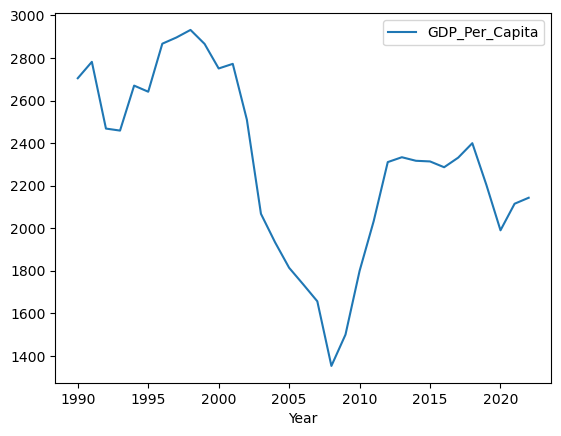

In [40]:
gdp_df[gdp_df["Country"]=="Zimbabwe"].plot(x="Year",
            y="GDP_Per_Capita",
            kind="line")

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [42]:
gdp_2020[["Country", "GDP_Per_Capita"]].agg(min)

C:\Users\erica\AppData\Local\Temp\ipykernel_3820\2827137254.py:1: FutureWarning: The provided callable <built-in function min> is currently using DataFrame.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  gdp_2020[["Country", "GDP_Per_Capita"]].agg(min)


Country           Afghanistan
GDP_Per_Capita     711.355263
dtype: object

<Axes: xlabel='Year'>

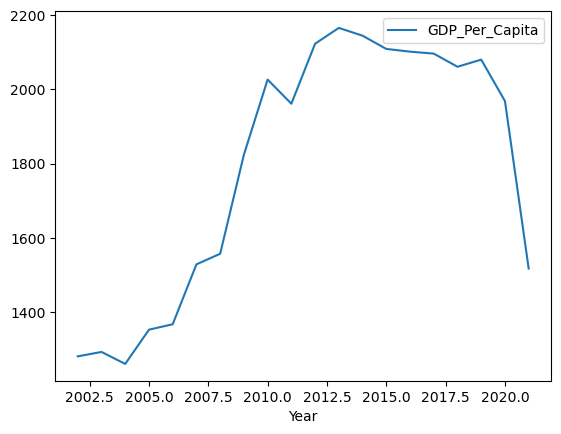

In [43]:
gdp_df[gdp_df["Country"]=="Afghanistan"].plot(x="Year",
            y="GDP_Per_Capita",
            kind="line")

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors 

internet_df = pd.read_csv(r'C:\DA12\projects\un-python-ericahen\data\internet_use.csv')
skip line 6378

In [46]:
internet_df = pd.read_csv(r'C:\DA12\projects\un-python-ericahen\data\internet_use.csv', 
                                    on_bad_lines='skip')

^ I dont think that is the correct code that rob told us to use in class to skip that line, but I cannot find the right one written anywhere in my notes. I found this solution on stack overflow.

internet_df = pd.read_csv(r'C:\DA12\projects\un-python-ericahen\data\internet_use.csv')[:-1]

In [49]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6380 non-null   object 
 1   Year             6380 non-null   object 
 2   Value            6083 non-null   float64
 3   Value Footnotes  2826 non-null   object 
dtypes: float64(1), object(3)
memory usage: 199.5+ KB


In [50]:
internet_df.value_counts()

Country or Area  Year  Value      Value Footnotes
Afghanistan      2001  0.004723   4                  1
Pakistan         2017  13.780000  4                  1
North Macedonia  2012  57.449900  203                1
                 2013  65.240000  203                1
                 2014  68.058500  70                 1
                                                    ..
Germany          2009  79.000000  44                 1
                 2010  82.000000  44                 1
                 2011  81.270000  105                1
                 2012  82.350000  34                 1
Zimbabwe         2022  32.561500  4                  1
Name: count, Length: 2826, dtype: int64

In [51]:
internet_df.head(5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.60,1
1,Afghanistan,2018,16.80,2
2,Afghanistan,2017,13.50,3
3,Afghanistan,2016,11.00,4
4,Afghanistan,2015,8.26,4


15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [53]:
internet_df=internet_df.drop(columns='Value Footnotes')

In [54]:
internet_df.head()

,Country or Area,Year,Value
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


In [55]:
internet_df=internet_df.rename(columns={'Country or Area' : 'Country', 'Value' : 'Internet_Users_Pct'})
internet_df.head(5)

,Country,Year,Internet_Users_Pct
0,Afghanistan,2019,17.60
1,Afghanistan,2018,16.80
2,Afghanistan,2017,13.50
3,Afghanistan,2016,11.00
4,Afghanistan,2015,8.26


16. Look at the number of observations in this dataset per year. What do you notice?

internet_df[internet_df['Year'].info()]

In [94]:
internet_df.value_counts()

Country      Year  Internet_Users_Pct
Afghanistan  1990  0.0000                1
Nicaragua    2009  7.3000                1
             2018  37.6000               1
             2017  30.4000               1
             2016  24.5718               1
                                        ..
France       2013  81.9198               1
             2012  81.4400               1
             2011  77.8200               1
             2010  77.2800               1
Zimbabwe     2022  32.5615               1
Name: count, Length: 6083, dtype: int64

17. What is the first year to have a non-zero internet users percentage value?

In [98]:
internet_df[internet_df["Internet_Users_Pct"]>0].min()

Country               Afghanistan
Year                         1990
Internet_Users_Pct       0.000018
dtype: object

18. How does the distribution of internet users percent differ for 2000 and 2014?

In [104]:
internet2000 = internet_df[internet_df['Year'] == 2000]
internet2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             0 non-null      object 
 1   Year                0 non-null      object 
 2   Internet_Users_Pct  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [106]:
internet2014 = internet_df[internet_df['Year'] == 2014]
internet2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             0 non-null      object 
 1   Year                0 non-null      object 
 2   Internet_Users_Pct  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 0.0+ bytes


In [120]:
internet2000_and_2014 = pd.concat([internet2000, internet2014])

array([[<Axes: title={'center': 'Internet_Users_Pct'}>]], dtype=object)

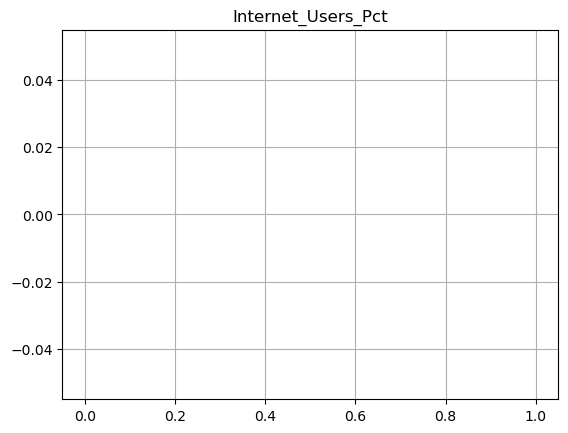

In [122]:
internet2000_and_2014.hist()

????

19. For how many countries was the percentage of internet users below 5% in 2014?


20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [124]:
gdp_and_internet_use = pd.concat([gdp_df, internet_df])
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14042 entries, 0 to 6379
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             14042 non-null  object 
 1   Year                14042 non-null  object 
 2   GDP_Per_Capita      7662 non-null   float64
 3   Internet_Users_Pct  6083 non-null   float64
dtypes: float64(2), object(2)
memory usage: 548.5+ KB


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

gdp_and_internet_use[gdp_and_internet_use["Country"]("Internet_Users_Pct").max()]

In [130]:
gdp_internet_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [132]:
top_3_countries = gdp_internet_2014.nlargest(3, 'Internet_Users_Pct')['Country']

In [134]:
print(top_3_countries)

7                     Afghanistan
28    Africa Eastern and Southern
61     Africa Western and Central
Name: Country, dtype: object


g = sns.FacetGrid(top_3_countries, col="Internet_Users_Pct", "Country")
g.map_dataframe(sns.scatterplot, "Internet_Users_Pct", "Country")

22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

In [136]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

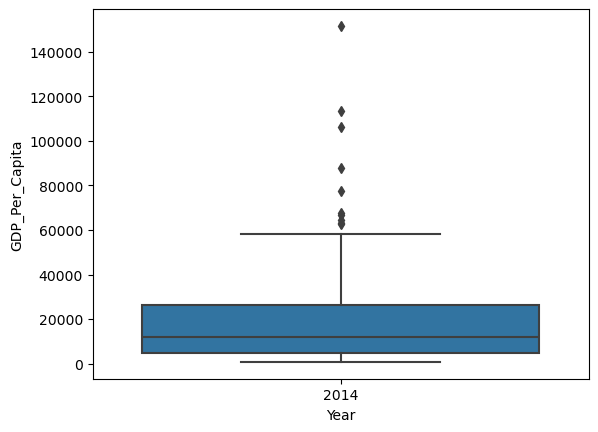

In [157]:
sns.boxplot( x=gdp_and_internet_use_2014["Year"], y=gdp_and_internet_use_2014["GDP_Per_Capita"] )